In [225]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [226]:
from influxdb import InfluxDBClient
from influxdb import DataFrameClient
import numpy as np
import pandas as pd

client = DataFrameClient(host='influxdb', port=8086, username='root', password='root' , database='testdb')

# =====Block 1=====
T_Block1_Office_SW_query = client.query('SELECT value FROM "Temperature" WHERE "node" = \'T_Block1_OfficeXSWX1f\'')
T_Block1_Office_SE_query = client.query('SELECT value FROM "Temperature" WHERE "node" = \'T_Block1_OfficeXSEX1f\'')
T_Block1_Office_NW_query = client.query('SELECT value FROM "Temperature" WHERE "node" = \'T_Block1_OfficeXNWX1f\'')
T_Block1_Office_NE_query = client.query('SELECT value FROM "Temperature" WHERE "node" = \'T_Block1_OfficeXNEX1f\'')
T_Block1_Corridor_query = client.query('SELECT value FROM "Temperature" WHERE "node" = \'T_Block1_CorridorX1f\'')
# =====Block 2=====
T_Block2_Office_SW_query = client.query('SELECT value FROM "Temperature" WHERE "node" = \'T_Block2_OfficeXSWX2f\'')
T_Block2_Office_SE_query = client.query('SELECT value FROM "Temperature" WHERE "node" = \'T_Block2_OfficeXSEX2f\'')
T_Block2_Office_NW_query = client.query('SELECT value FROM "Temperature" WHERE "node" = \'T_Block2_OfficeXNWX2f\'')
T_Block2_Office_NE_query = client.query('SELECT value FROM "Temperature" WHERE "node" = \'T_Block2_OfficeXNEX2f\'')
T_Block2_Corridor_query = client.query('SELECT value FROM "Temperature" WHERE "node" = \'T_Block2_CorridorX2f\'')

# =====T Out=====
T_out_query = client.query('SELECT "value" FROM "Temperature" WHERE "node" = \'T_out\'')

# =====D Cooling=====
DCooling_query = client.query('SELECT "value" FROM "Power" WHERE "node" = \'DistrictCooling\'')
DHeating_query = client.query('SELECT "value" FROM "Power" WHERE "node" = \'DistrictHeating\'')


# =====DNI=====
DNI_query = client.query('SELECT "value" FROM "Solar_Radiation" WHERE "node" = \'DNI\'')

In [227]:
T_in_df = T_Block1_Office_SW_query ["Temperature"]
T_in_df.rename(columns={'value': 'T_Block1_Office_SW'}, inplace=True)

# =====Block 1=====
T_in_df['T_Block1_Office_SE'] = T_Block1_Office_SE_query['Temperature']['value']
T_in_df['T_Block1_Office_NW'] = T_Block1_Office_NW_query['Temperature']['value']
T_in_df['T_Block1_Office'] = T_Block1_Office_NE_query['Temperature']['value']
T_in_df['T_Block1_Corridor'] = T_Block1_Corridor_query['Temperature']['value']

# =====Block 2=====
T_in_df['T_Block2_Office_SW'] = T_Block2_Office_SW_query['Temperature']['value']
T_in_df['T_Block2_Office_SE'] = T_Block2_Office_SE_query['Temperature']['value']
T_in_df['T_Block2_Office_NW'] = T_Block2_Office_NW_query['Temperature']['value']
T_in_df['T_Block2_Office_NE'] = T_Block2_Office_NE_query['Temperature']['value']
T_in_df['T_Block2_Corridor'] = T_Block2_Corridor_query['Temperature']['value']


T_in_df = T_in_df[T_in_df.index > "1994-01-01 00:10:00+00:00"]
T_in_df = T_in_df[T_in_df.index < "1995-01-01 00:10:00+00:00"]
T_in_df


T_in_df.dropna(inplace=True)

T_in_df['mean_office'] = T_in_df.mean(axis=1)

T_in_df

,T_Block1_Office_SW,T_Block1_Office_SE,T_Block1_Office_NW,T_Block1_Office,T_Block1_Corridor,T_Block2_Office_SW,T_Block2_Office_SE,T_Block2_Office_NW,T_Block2_Office_NE,T_Block2_Corridor,mean_office
1994-01-01 01:00:00+00:00,28.675876,28.675876,25.096591,25.096591,27.201321,28.440561,28.440561,25.109080,25.109080,27.187463,26.903300
1994-01-01 05:00:00+00:00,27.978262,27.978262,24.639865,24.639865,26.763361,27.668877,27.668877,24.544583,24.544583,26.626190,26.305273
1994-01-01 06:00:00+00:00,27.823464,27.823464,24.545015,24.545015,26.660989,27.500268,27.500268,24.428312,24.428312,26.496982,26.175209
1994-01-01 07:00:00+00:00,27.684744,27.684744,24.465681,24.465681,26.568500,27.349579,27.349579,24.329868,24.329868,26.379655,26.060790
1994-01-01 08:00:00+00:00,29.174030,29.174030,25.861087,25.861087,27.580310,28.851629,28.851629,25.719487,25.719487,27.376299,27.416907
...,...,...,...,...,...,...,...,...,...,...,...
1994-12-31 11:00:00+00:00,26.881140,26.881140,24.154447,24.154447,25.518733,26.769601,26.769601,24.143081,24.143081,25.437210,25.485248
1994-12-31 12:00:00+00:00,27.639105,27.639105,24.573163,24.573163,26.065228,27.565646,27.565646,24.577212,24.577212,26.011357,26.078684
1994-12-31 13:00:00+00:00,28.243161,28.243161,25.091978,25.091978,26.475792,28.199129,28.199129,25.117818,25.117818,26.452175,26.623214
1994-12-31 14:00:00+00:00,28.512369,28.512369,25.259325,25.259325,26.667094,28.490847,28.490847,25.315510,25.315510,26.685511,26.850871


In [228]:
T_out_df = T_out_query['Temperature']['value']
T_out_df = T_out_df[T_out_df.index > "1994-01-01 00:10:00+00:00"]
T_out_df = T_out_df[T_out_df.index < "1995-01-01 00:10:00+00:00"]
T_out_df

1994-01-01 01:00:00+00:00    14.2
1994-01-01 04:00:00+00:00    12.5
1994-01-01 05:00:00+00:00    12.2
1994-01-01 06:00:00+00:00    12.0
1994-01-01 07:00:00+00:00    12.0
                             ... 
1994-12-31 11:00:00+00:00    17.2
1994-12-31 12:00:00+00:00    18.8
1994-12-31 13:00:00+00:00    19.8
1994-12-31 14:00:00+00:00    20.3
1994-12-31 15:00:00+00:00    20.2
Name: value, Length: 4586, dtype: float64

## create heating and cooling

In [229]:
DHeating_query['Power']['value'] = DHeating_query['Power']['value']/(1.8 * 10**6)
DHeating_df = DHeating_query['Power']
DHeating_df = DHeating_df[DHeating_df.index > "1994-01-01 00:10:00+00:00"]
DHeating_df = DHeating_df[DHeating_df.index < "1995-01-01 00:10:00+00:00"]
DHeating_df

,value
1994-01-01 01:00:00+00:00,0.0
1994-01-01 05:00:00+00:00,0.0
1994-01-01 06:00:00+00:00,0.0
1994-01-01 07:00:00+00:00,0.0
1994-01-01 08:00:00+00:00,0.0
...,...
1994-12-31 12:00:00+00:00,0.0
1994-12-31 13:00:00+00:00,0.0
1994-12-31 14:00:00+00:00,0.0
1994-12-31 15:00:00+00:00,0.0


In [230]:
DCooling_query['Power']['value'] = DCooling_query['Power']['value']/(3.6 * 10**6)
DCooling_df = DCooling_query['Power']
DCooling_df = DCooling_df[DCooling_df.index > "1994-01-01 00:10:00+00:00"]
DCooling_df = DCooling_df[DCooling_df.index < "1995-01-01 00:10:00+00:00"]
DCooling_df

,value
1994-01-01 01:00:00+00:00,0.0
1994-01-01 02:00:00+00:00,0.0
1994-01-01 05:00:00+00:00,0.0
1994-01-01 06:00:00+00:00,0.0
1994-01-01 07:00:00+00:00,0.0
...,...
1994-12-31 13:00:00+00:00,0.0
1994-12-31 14:00:00+00:00,0.0
1994-12-31 15:00:00+00:00,0.0
1994-12-31 17:00:00+00:00,0.0


## create DNI

In [231]:
DNI_df = DNI_query['Solar_Radiation']
DNI_df = DNI_df.reset_index(drop=True)
DNI_df

,value
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
7214,0.0
7215,0.0
7216,0.0
7217,0.0


In [232]:
df = pd.DataFrame()

In [233]:
df = pd.DataFrame(T_in_df['mean_office'])
df

,mean_office
1994-01-01 01:00:00+00:00,26.903300
1994-01-01 05:00:00+00:00,26.305273
1994-01-01 06:00:00+00:00,26.175209
1994-01-01 07:00:00+00:00,26.060790
1994-01-01 08:00:00+00:00,27.416907
...,...
1994-12-31 11:00:00+00:00,25.485248
1994-12-31 12:00:00+00:00,26.078684
1994-12-31 13:00:00+00:00,26.623214
1994-12-31 14:00:00+00:00,26.850871


In [234]:
df['T_out'] = T_out_df
df = df.rename(columns={'mean_office':'T_in'})
df['District_Heating [kW]'] = DHeating_df
df['District_Cooling [kW]'] = DCooling_df
df.head(n=10)

,T_in,T_out,District_Heating [kW],District_Cooling [kW]
1994-01-01 01:00:00+00:00,26.903300,14.2,0.0,0.0
1994-01-01 05:00:00+00:00,26.305273,12.2,0.0,0.0
1994-01-01 06:00:00+00:00,26.175209,12.0,0.0,0.0
1994-01-01 07:00:00+00:00,26.060790,12.0,0.0,0.0
1994-01-01 08:00:00+00:00,27.416907,12.9,0.0,0.0
1994-01-01 09:00:00+00:00,25.494809,14.7,0.0,0.0
1994-01-01 10:00:00+00:00,26.432962,16.5,0.0,0.0
1994-01-01 11:00:00+00:00,26.867344,18.2,0.0,0.0
1994-01-01 12:00:00+00:00,27.449700,19.5,0.0,0.0
1994-01-01 13:00:00+00:00,27.817969,20.3,0.0,0.0


In [235]:
df.to_csv('energy_signature_data_after_control.csv')

## Start here

In [236]:
df = pd.read_csv('energy_signature_data_after_control.csv',index_col=0)
df.index = pd.to_datetime(df.index)

Text(0, 0.5, 'W')

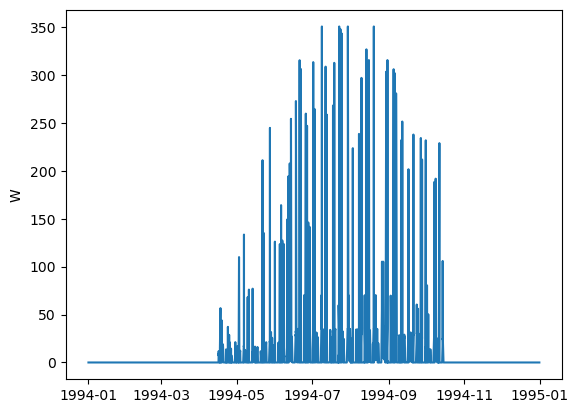

In [237]:
plt.plot(df['District_Cooling [kW]'])
plt.ylabel("W")

In [238]:
#df['deltaT']=df.T_in-df.T_out
df['deltaT']=df.T_out-df.T_in

df_cool = df[df['District_Cooling [kW]'] > 0.12]
df_heat = df[df['District_Heating [kW]'] > 0.12]

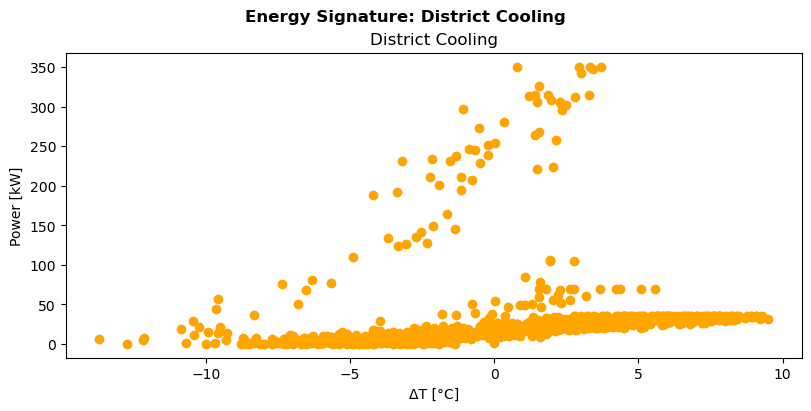

In [239]:
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
fig.suptitle("Energy Signature: District Cooling", fontweight="bold")

ax.scatter(df_cool.deltaT, df_cool['District_Cooling [kW]'], color='orange')

ax.set_title("District Cooling")
ax.set_xlabel("\u0394T [°C]")
ax.set_ylabel("Power [kW]")

plt.show()


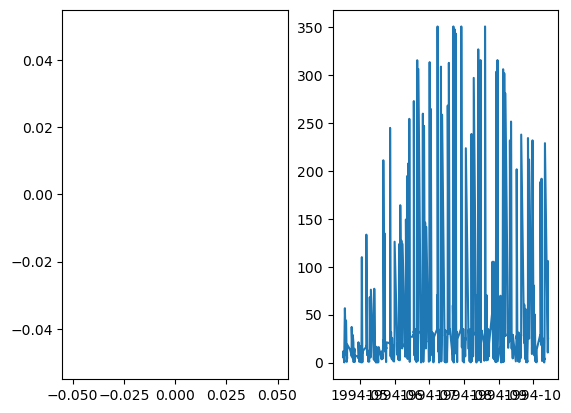

In [240]:
fig, axs = plt.subplots(1,2)
#plt.scatter(df.deltaT,df['District_Heating [W]'])
axs[0].plot(df_heat['District_Heating [kW]'])
axs[1].plot(df_cool['District_Cooling [kW]'])

In [241]:
df=df.resample('h').mean()
df_cool = df[df['District_Cooling [kW]'] > 0.12]
df_heat = df[df['District_Heating [kW]'] > 0.12]

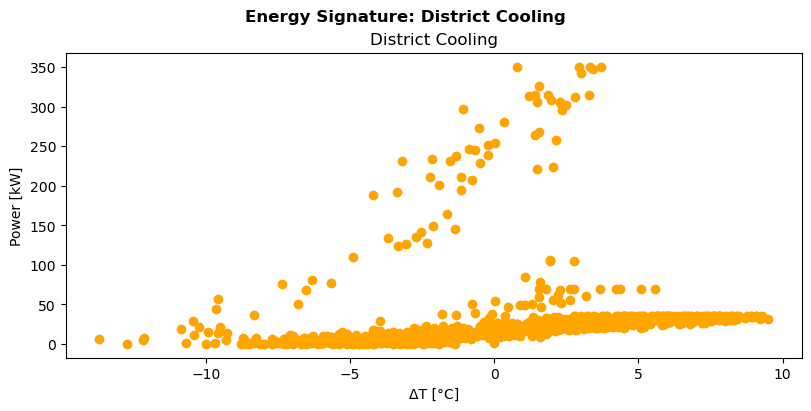

In [242]:
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
fig.suptitle("Energy Signature: District Cooling", fontweight="bold")

ax.scatter(df_cool.deltaT, df_cool['District_Cooling [kW]'], color='orange')

ax.set_title("District Cooling")
ax.set_xlabel("\u0394T [°C]")
ax.set_ylabel("Power [kW]")

plt.show()


In [243]:
df=df.resample('d').mean()
df_cool = df[df['District_Cooling [kW]'] > 0.12]
df_heat = df[df['District_Heating [kW]'] > 0.12]


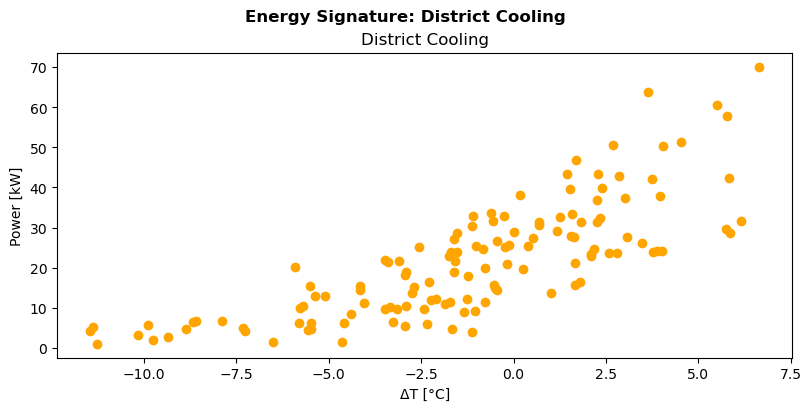

In [244]:
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
fig.suptitle("Energy Signature: District Cooling", fontweight="bold")


ax.scatter(df_cool.deltaT, df_cool['District_Cooling [kW]'], color='orange')

ax.set_title("District Cooling")
ax.set_xlabel("\u0394T [°C]")
ax.set_ylabel("Power [kW]")

plt.show()


In [245]:
df=df.resample('W').mean()
df_cool = df[df['District_Cooling [kW]'] > 0.12]
df_heat = df[df['District_Heating [kW]'] > 0.12]
#df_cool = df_cool.resample('W').mean()
#df_heat = df_heat.resample('W').mean()

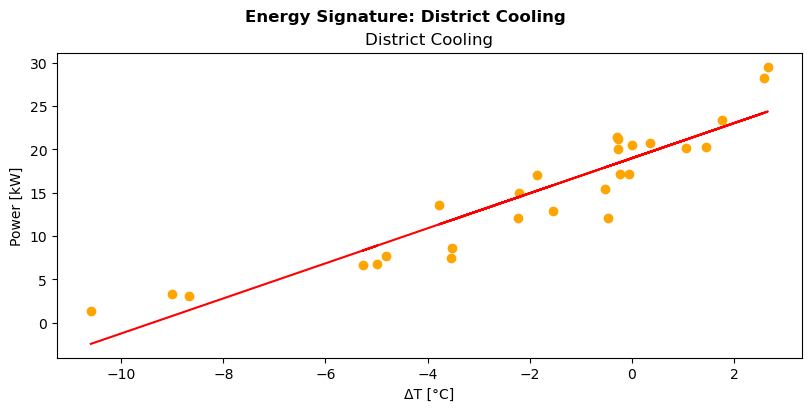

In [246]:
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
fig.suptitle("Energy Signature: District Cooling", fontweight="bold")
# Plot regression line
ax.plot(df_cool.deltaT, results_cooling.predict(), color='red', label='Regression Line')

ax.scatter(df_cool.deltaT, df_cool['District_Cooling [kW]'], color='orange')

ax.set_title("District Cooling")
ax.set_xlabel("\u0394T [°C]")
ax.set_ylabel("Power [kW]")

plt.show()


In [247]:
df=df.dropna()

In [248]:
df_cool

,T_in,T_out,District_Heating [kW],District_Cooling [kW],deltaT
1994-04-17 00:00:00+00:00,29.078917,18.487170,0.0,1.324027,-10.591747
1994-04-24 00:00:00+00:00,26.014685,17.020045,0.0,3.299936,-8.994640
1994-05-01 00:00:00+00:00,25.906892,17.234357,0.0,3.080231,-8.672535
1994-05-08 00:00:00+00:00,26.475950,21.492086,0.0,6.729644,-4.983864
1994-05-15 00:00:00+00:00,26.364720,21.103952,0.0,6.636730,-5.269671
1994-05-22 00:00:00+00:00,26.436835,21.630107,0.0,7.697457,-4.817755
1994-05-29 00:00:00+00:00,26.542690,24.994381,0.0,12.904222,-1.550396
1994-06-05 00:00:00+00:00,26.981228,23.464362,0.0,8.570708,-3.526434
1994-06-12 00:00:00+00:00,26.782636,24.887015,0.0,17.022941,-1.862392
1994-06-19 00:00:00+00:00,26.827845,26.559301,0.0,21.241996,-0.268544


In [249]:
model_cooling = sm.OLS(df_cool['District_Cooling [kW]'],sm.add_constant(df_cool.deltaT))

In [250]:
results_cooling=model_cooling.fit()

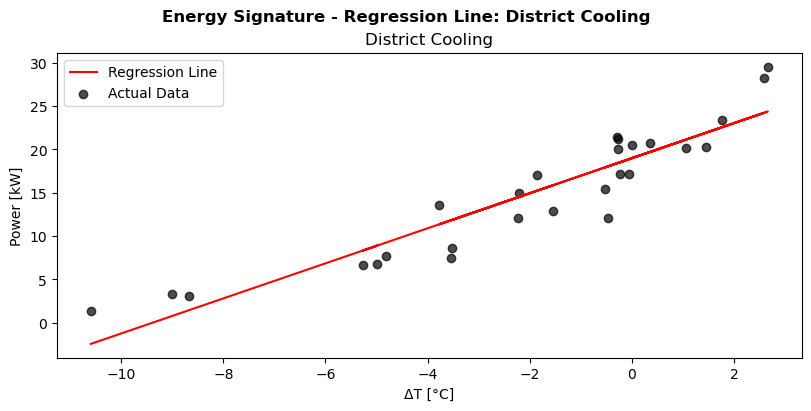

In [251]:
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
fig.suptitle("Energy Signature - Regression Line: District Cooling", fontweight="bold")

# Plot regression line
ax.plot(df_cool.deltaT, results_cooling.predict(), color='red', label='Regression Line')

# Scatter actual data
ax.scatter(df_cool.deltaT, df_cool['District_Cooling [kW]'], color='black', alpha=0.7, label='Actual Data')

# Axis titles and labels
ax.set_title("District Cooling")
ax.set_xlabel("\u0394T [°C]")
ax.set_ylabel("Power [kW]")

# Optional legend
ax.legend()

plt.show()


In [252]:
results_cooling.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     District_Cooling [kW]   R-squared:                       0.863
Model:                               OLS   Adj. R-squared:                  0.857
Method:                    Least Squares   F-statistic:                     157.3
Date:                   Fri, 30 May 2025   Prob (F-statistic):           2.77e-12
Time:                           12:33:45   Log-Likelihood:                -65.490
No. Observations:                     27   AIC:                             135.0
Df Residuals:                         25   BIC:                             137.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9962      0.636     29.853      0.000      17.686      20.307
deltaT         2.0234      0.161     12.542      0.000       1.691       2.356
==============================================================================
Omnibus:                        0.810   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.748
Skew:                          -0.107   Prob(JB):                        0.688
Kurtosis:                       2.213   Cond. No.                         4.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""